(array([58.,  0.,  0.,  0.,  0., 71.,  0.,  0.,  0., 48.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

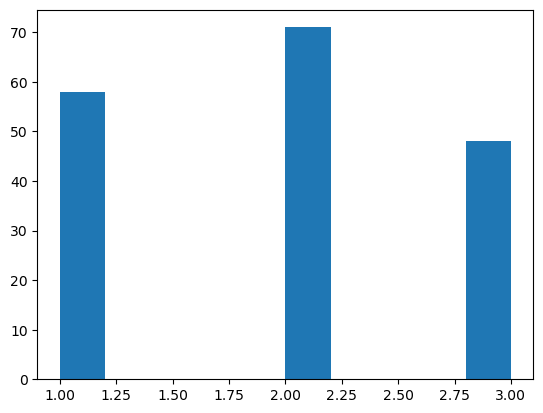

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

ruta_al_archivo = 'wine.data'
data_df = pd.read_csv(ruta_al_archivo, delimiter=',')
nombres_columnas = ['Clase', 'Alcohol','Ácido málico', 'Ceniza','Alcalinidad de la ceniza', 'Magnesio','Fenoles totales', 
                    'Flavonoides','Fenoles no flavonoides', 'Proantocianinas','Intensidad de color', 'Tono', 'DO280 / DO315 de vinos diluidos',
                    'Prolina']
data_df.columns = nombres_columnas
plt.hist(data_df.Clase)

In [3]:
predictors_col =   ['Alcohol','Ácido málico', 'Ceniza','Alcalinidad de la ceniza', 'Magnesio','Fenoles totales', 
                    'Flavonoides','Fenoles no flavonoides', 'Proantocianinas','Intensidad de color', 'Tono', 'DO280 / DO315 de vinos diluidos',
                    'Prolina']
target_col =    ['Clase']

predictors =   data_df[predictors_col]
target =    data_df[target_col]

In [306]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.4, random_state=20)
tree= DecisionTreeClassifier()
arbol = tree.fit(X_train, y_train)

[Text(0.4583333333333333, 0.9, 'x[9] <= 3.82\ngini = 0.663\nsamples = 106\nvalue = [38, 38, 30]'),
 Text(0.25, 0.7, 'x[11] <= 3.73\ngini = 0.105\nsamples = 36\nvalue = [2, 34, 0]'),
 Text(0.16666666666666666, 0.5, 'x[2] <= 3.0\ngini = 0.056\nsamples = 35\nvalue = [1, 34, 0]'),
 Text(0.08333333333333333, 0.3, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.25, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.6666666666666666, 0.7, 'x[6] <= 2.11\ngini = 0.549\nsamples = 70\nvalue = [36, 4, 30]'),
 Text(0.5, 0.5, 'x[6] <= 1.4\ngini = 0.165\nsamples = 33\nvalue = [0, 3, 30]'),
 Text(0.4166666666666667, 0.3, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 29]'),
 Text(0.5833333333333334, 0.3, 'x[3] <= 23.25\ngini = 0.375\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(

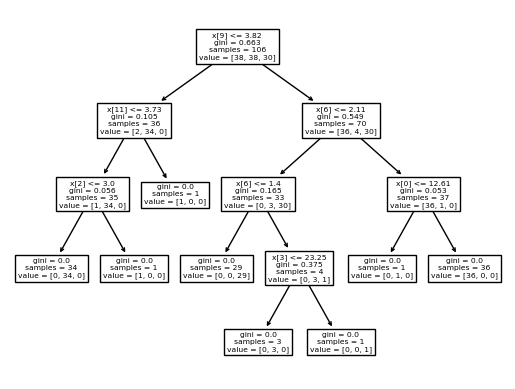

In [307]:
plot_tree(arbol)

In [308]:
predicciones = arbol.predict(X_test)

In [309]:
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,1,2,3
Actual,,,
1,19,1,0
2,2,31,0
3,0,0,18


In [310]:
accuracy = accuracy_score(y_test, predicciones)
accuracy

0.9577464788732394